In [1]:
import numpy as np
import pandas as pd
import json
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style("darkgrid")

In [3]:
sns.set_context(font_scale=2)

In [4]:
files = glob.glob("../results/mnli/1_3/*.json")

In [5]:
files

['../results/mnli/1_3/distilroberta-base-results.json',
 '../results/mnli/1_3/roberta-base-results.json',
 '../results/mnli/1_3/bert-base-uncased-results.json',
 '../results/mnli/1_3/distilbert-base-uncased-results.json']

In [6]:
for file in files:
    with open(file, "r") as f:
        data = json.load(f)
    break

In [7]:
models = []
source_domains = []
distributions = []
f_scores = []

In [8]:
count = 0
for file in files:
    with open(file, "r") as f:
        data = json.load(f)
    for task in data.keys():
        for model in data[task].keys():
            for source in data[task][model]:
                scores = []
                for target in data[task][model][source].keys():
                    count += 1
                    if source==target:
                        f1 = round(data[task][model][source][target].get("f1"), 4)
                        models.append(model.split("-")[0])
                        source_domains.append(source)
                        distributions.append("iid")
                        f_scores.append(f1)

                    else:
                        f1 = round(data[task][model][source][target].get("f1"), 4)
                        scores.append(f1)
                models.append(model.split("-")[0])
                source_domains.append(source)
                distributions.append("ood")
                f_scores.append(np.mean(scores))

        #         break
        #     break
        # break


In [9]:
count

100

In [10]:
tips = sns.load_dataset("tips")


In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
df = pd.DataFrame(
    data={
        "model":models,
        "domain":source_domains,
        "distribution":distributions,
        "macro-f1":f_scores,
    }
)

In [13]:
df.head()

,model,domain,distribution,macro-f1
0,distilroberta,government,iid,0.83400
1,distilroberta,government,ood,0.76200
2,distilroberta,telephone,iid,0.81790
3,distilroberta,telephone,ood,0.75765
4,distilroberta,fiction,iid,0.80080


In [14]:
sns.set_context("paper", rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":10})   


In [15]:
sns.set(font_scale = 1.2)

In [16]:
df['macro-f1'] = df['macro-f1']*100

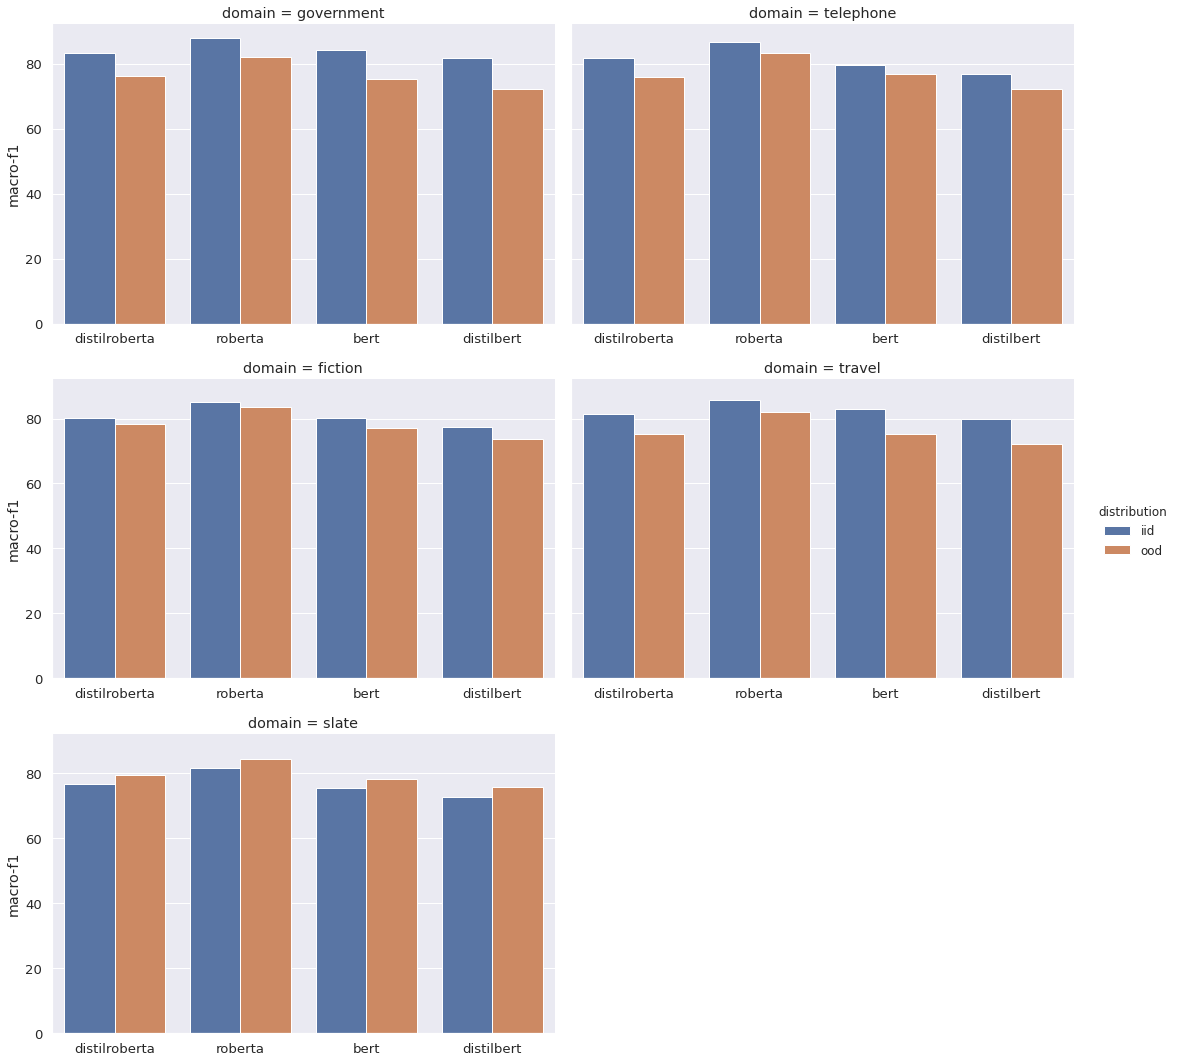

In [17]:
# plt.figure(figsize=(16,16))
ax = sns.catplot(x="model", y="macro-f1",hue="distribution", col="domain", col_wrap=2,data=df, sharex=False, kind="bar",height=5, aspect=1.5, alpha=1.0);
# ax.set_titles(fontsize=40)
plt.setp(ax._legend.get_title(), fontsize=12)
plt.setp(ax._legend.get_texts(), fontsize=12)
ax.set_xlabels(label="")
# ax.set_ylabels(label="")

plt.show()

In [18]:
import plotly.express as px

In [19]:
# df = px.data.tips()
fig = px.bar(df, x="model", y="macro-f1", text="macro-f1", color="distribution", barmode="group", facet_col="domain",
             category_orders={"model": ["bert", "distilbert", "roberta", "distilroberta"]}, width=1200, height=500)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    title={
        'text': "Paraphrase Identification",
        'y':0.98,
        'x':0.48,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="",
    yaxis_title="",
    font=dict(
        family="Courier New, monospace",
        # size=10,
        color="RebeccaPurple",
    )
)
fig.update_yaxes(showticklabels=False)

fig.show()

In [20]:
# fig.update_xaxes

In [21]:
# fig.update_layout(
#     yaixs={"size"}
# )

In [22]:
### Agregate performance drop

In [23]:
models = []
f1_scores = []
distributions = []
model_name = []
prformance_drop = []
for model in np.unique(list(df['model'].values)):
    models.append(model)
    iid_f1 = np.mean(list(df[df['model']==model][df['distribution']=="iid"]['macro-f1']))
    f1_scores.append(iid_f1)
    distributions.append('iid')
    ood_f1 = np.mean(list(df[df['model']==model][df['distribution']=="ood"]['macro-f1']))
    models.append(model)
    f1_scores.append(ood_f1)
    distributions.append('ood')
    model_name.append(model)
    prformance_drop.append(iid_f1-ood_f1)


<ipython-input-23-85aa469fb036>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-23-85aa469fb036>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [24]:
df_one = pd.DataFrame(data={
    "model":models,
    "distribution":distributions,
    "macro-f1":f1_scores
})

In [25]:
# ax = sns.barplot(x="model", y="macro-f1", hue="distribution", data=df_one, alpha=1.0)
# ax.legend(bbox_to_anchor=(1.1, 1.05))
# ax.set_title("IID vs OOD Performance")
# ax.set_xlabel(xlabel="")
# # ax.set_ylabel(ylabel="")

In [26]:
df_one.head()

,model,distribution,macro-f1
0,bert,iid,80.4940
1,bert,ood,76.5040
2,distilbert,iid,77.6760
3,distilbert,ood,73.2085
4,distilroberta,iid,80.6820


In [27]:
# df = px.data.tips()
fig = px.bar(df_one, x="model", y="macro-f1", text="macro-f1", color="distribution", barmode="group",category_orders={"model": ["bert", "distilbert", "roberta", "distilroberta"]}, width=800, height=400)

fig.update_traces(texttemplate='%{text:.2f}', textposition='inside')
fig.update_layout(
    title={
        'text': "",
        'y':0.98,
        'x':0.48,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="",
    yaxis_title="Micro-F1",
    font=dict(
        family="Courier New, monospace",
        size=12,
        # color="RebeccaPurple",
    ), 
    uniformtext_minsize=14
)
fig.update_yaxes(showticklabels=False)
# fig.update_xaxes(tickwidth=20)
fig.show()

In [28]:
distil_dict = {
    "bert":"vanilla",
    "distilbert":"distilled",
    "roberta":"vanilla",
    "distilroberta":"distilled",
}
model_dict = {
    "bert":"bert",
    "distilbert":"bert",
    "roberta":"roberta",
    "distilroberta":"roberta",
}

In [29]:
model_name_ = [model_dict[model] for model in model_name]
distil_name = [distil_dict[model] for model in model_name]

In [30]:
print(model_name_, distil_name)

['bert', 'bert', 'roberta', 'roberta'] ['vanilla', 'distilled', 'distilled', 'vanilla']


In [31]:
df_pd = pd.DataFrame(
    data={
        "model":model_name_,
        "pd":prformance_drop,
        "type":distil_name,
    }
)

In [32]:
df_pd.head()

,model,pd,type
0,bert,3.9900,vanilla
1,bert,4.4675,distilled
2,roberta,3.6990,distilled
3,roberta,2.2860,vanilla


In [33]:
# df = px.data.tips()
fig = px.bar(df_pd, x="model", y="pd", text="pd", color="type", barmode="group",category_orders={"model": ["bert", "roberta"]}, width=600, height=400)

fig.update_traces(texttemplate='%{text:.2f}', textposition='inside')
fig.update_layout(
    title={
        'text': "",
        'y':0.98,
        'x':0.48,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="",
    yaxis_title="Performance Drop",
    font=dict(
        family="Courier New, monospace",
        size=12,
        # color="RebeccaPurple",

    ), 
    uniformtext_minsize=14
)
fig.update_yaxes(showticklabels=False)
# fig.update_xaxes(tickwidth=20)
fig.show()

Text(0.5, 1.0, 'Performance Drop')

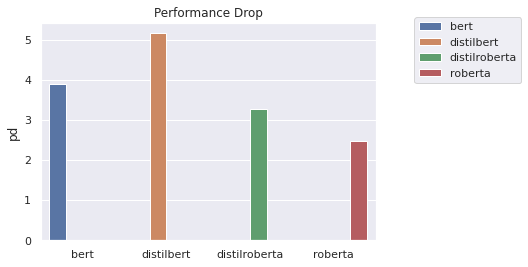

In [134]:
ax = sns.barplot(x='model', y='pd', data=df_pd, hue="model", alpha = 1.0)
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_xlabel(xlabel="")
# ax.set_ylabel(ylabel="")
ax.set_title("Performance Drop")

### New Experiment Visualization

In [1]:
import numpy as np
import pandas as pd
import json
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.set_style("darkgrid")
sns.set_theme(style="darkgrid")


In [5]:
penguins = sns.load_dataset("penguins")

In [10]:
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    ci="sd", palette="rf", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

ValueError: rf is not a valid palette name

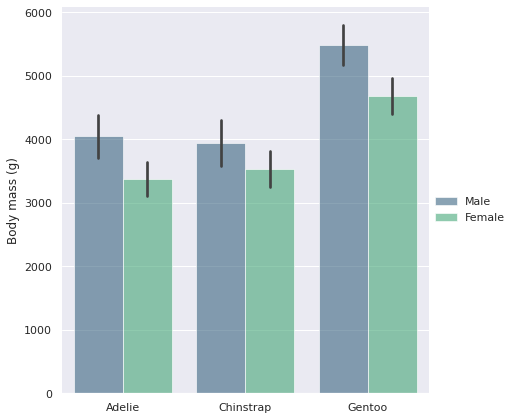

In [21]:
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    ci="sd", palette="viridis", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

In [20]:
x = ["BERT", "BERT", "RoBERTa", "RoBERTa"]
distilled = ["Vanilla", "Distilled", ]

In [22]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
